In [ ]:
import cv2
import glob
from google.colab.patches import cv2_imshow  # Importamos la función cv2_imshow

def get_frames():
    cap = cv2.VideoCapture('test.mp4')
    i = 0
    frame_skip = 10  # Cuántos frames saltar
    frame_count = 0  # Contador de frames guardados

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if i > frame_skip - 1:
            frame_count += 1
            file_name = f'test_{frame_count * frame_skip}.jpg'
            cv2.imwrite(file_name, frame)
            print(f"Imagen guardada: {file_name}")
            i = 0
            continue
        i += 1

    cap.release()
    cv2.destroyAllWindows()

def display_saved_images():
    images = glob.glob('test_*.jpg')  # Lista de imágenes guardadas
    for img_path in images:
        print(f"Mostrando: {img_path}")
        img = cv2.imread(img_path)
        if img is not None:
            cv2_imshow(img)  # Usamos cv2_imshow en lugar de cv2.imshow
            key = cv2.waitKey(2000)  # Espera 2 segundos o hasta que se presione una tecla
            if key == 27:  # Si presionas 'Esc', saldrá del bucle
                break
        else:
            print(f"No se pudo cargar la imagen: {img_path}")

    cv2.destroyAllWindows()

# Llamar a las funciones
get_frames()


Imagen guardada: test_10.jpg
Imagen guardada: test_20.jpg
Imagen guardada: test_30.jpg
Imagen guardada: test_40.jpg
Imagen guardada: test_50.jpg
Imagen guardada: test_60.jpg
Imagen guardada: test_70.jpg
Imagen guardada: test_80.jpg
Imagen guardada: test_90.jpg
Imagen guardada: test_100.jpg
Imagen guardada: test_110.jpg
Imagen guardada: test_120.jpg
Imagen guardada: test_130.jpg
Imagen guardada: test_140.jpg
Imagen guardada: test_150.jpg
Imagen guardada: test_160.jpg
Imagen guardada: test_170.jpg
Imagen guardada: test_180.jpg
Imagen guardada: test_190.jpg
Imagen guardada: test_200.jpg
Imagen guardada: test_210.jpg
Imagen guardada: test_220.jpg
Imagen guardada: test_230.jpg
Imagen guardada: test_240.jpg


Aclaración: lo cambiamos para que haga el display de una sola foto en vez de todos los frames guardados porque tardaba mucho.

El umbral R es de 125.0 el de S es de 117.0 y el de V es 128.0
¡Hay fuego en la imagen!


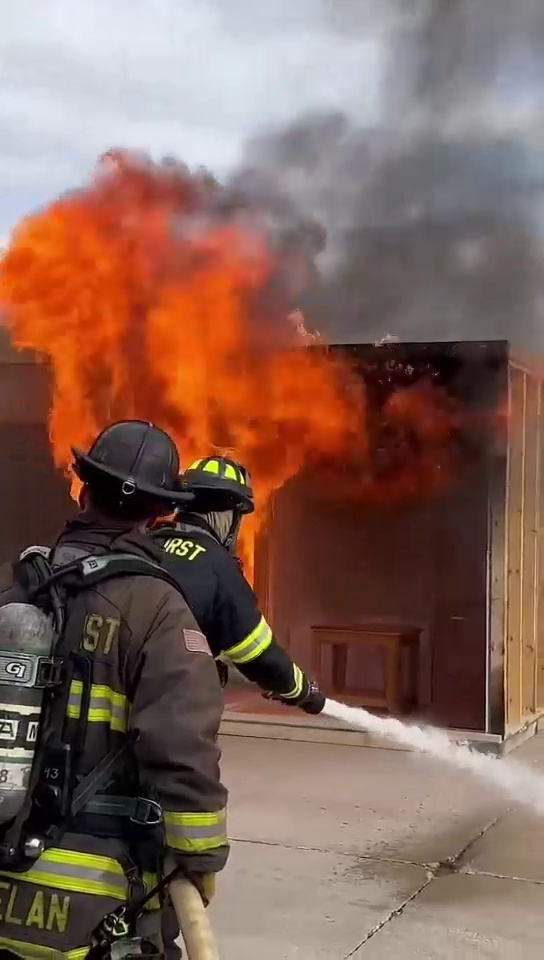

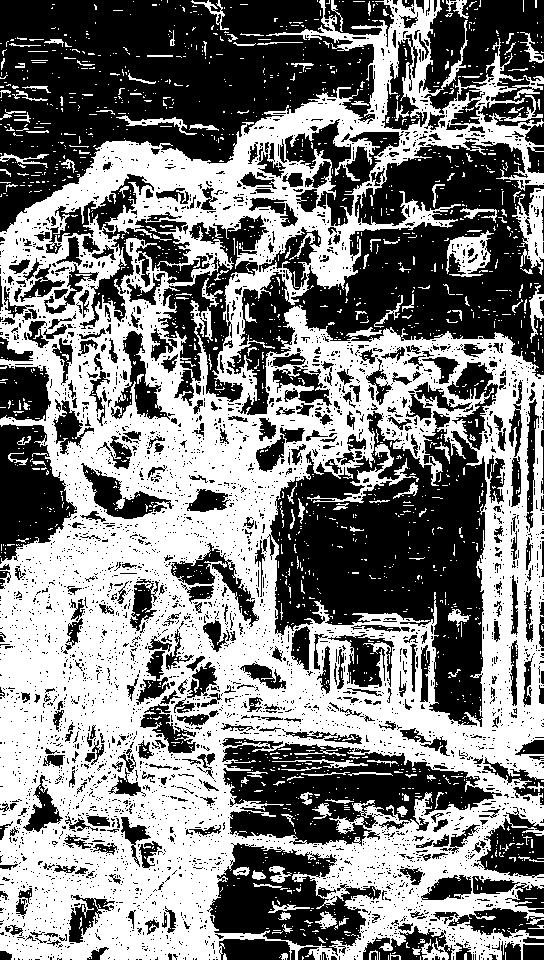

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Parámetros de umbral para la detección basada en color
# R_THRESHOLD = 50  # Umbral para el canal rojo



def detect_fire(image):
    """
    Detecta regiones de fuego en una imagen basada en color y bordes.
    :param image: Imagen de entrada en formato RGB.
    :return: Máscara binaria con las regiones detectadas.
    """
    # Convertir la imagen a formato RGB (por si acaso está en otro espacio de color)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Separar los canales R, G, B
    R = rgb_image[:, :, 0]
    G = rgb_image[:, :, 1]
    B = rgb_image[:, :, 2]

    # Separar los canales de color
    # r, g, b = cv2.split(rgb_image)

    # Aplicar el método de Otsu al canal rojo (R)
    umbral_otsu, _ = cv2.threshold(R, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Crear máscara basada en la intensidad de color (R > G > B y R > R_THRESHOLD)
    color_mask = (R >= G) & (G >= B) & (R > umbral_otsu)
    # color_mask = R < umbral_otsu
    # color_mask = color_mask.astype(np.uint8) * 255  # Convertir a escala binaria

    # Convertir la máscara a una imagen binaria para visualización
    imagen_fuego = np.zeros_like(R, dtype=np.uint8)
    imagen_fuego[color_mask] = 255

    # Convertir la imagen a HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    H = hsv_image[:, :, 0]
    S = hsv_image[:, :, 1]
    V = hsv_image[:, :, 2]


    umbral_S, _ = cv2.threshold(S, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    umbral_V, _ = cv2.threshold(V, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    print(f"El umbral R es de {umbral_otsu} el de S es de {umbral_S} y el de V es {umbral_V}")

    v_mask = V>umbral_V
    s_mask = S>umbral_S

    # Convertir la máscara a una imagen binaria para visualización
    imagen_v = np.zeros_like(V, dtype=np.uint8)
    imagen_v[v_mask] = 255

    imagen_s = np.zeros_like(S, dtype=np.uint8)
    imagen_s[s_mask] = 255


    # Convertir la imagen a escala de grises para aplicar Sobel
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar detección de bordes Sobel
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Derivada en X
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Derivada en Y
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_mask = np.uint8(sobel_magnitude > 10) * 255  # Umbral para bordes

    # Combinar las dos máscaras (color y bordes)
    combined_mask = imagen_fuego & imagen_v & imagen_s & sobel_mask

    return sobel_mask

# Cargar la imagen de entrada
image_path = "test_80.jpg"  # Cambia por la ruta de tu imagen
image = cv2.imread(image_path)

# Detectar fuego en la imagen
fire_mask = detect_fire(image)

# Mensaje de fuego
if np.sum(fire_mask==255)/fire_mask.size > 0.20:
    print("¡Hay fuego en la imagen!")
else:
    print("No se detectó fuego en la imagen.")

# Mostrar resultados
cv2_imshow(image)
cv2_imshow(fire_mask)